# Data Mining e Algoritmos
Data mining é o processo de descobrir informação preditiva a partir da análise de grandes bases de dados. Para um cientista de dados, data mining pode ser uma tarefa vaga e assustadora - requer um conjunto diverso de habilidades e conhecimento de várias técnicas de data mining para pegar um dado cru e conseguir visualizar informações com sucesso. É preciso entender os fundamentos de estatística e diferentes linguagens de programaçção que possam ajudar com a mineração de dados.
Aqui sera demonstrado um pequeno exemplo introdutório a mineração de dados usando Python, uma das ferramentas mais usadas em data mining - desde o tratamento e organização dos dados até a aplicação de algoritmos. Primeiro, vamos ter um entendimento melhor sobre data mining e como conseguir minerar os dados.
## Uma definição de data mining
O objetivo desejado da mineração de dados é criar um modelo a partir de um dado dataset que possua predições generalizadas para datasets similares. Um exemplo no mundo real de uma aplicação de mineração de dados de sucesso pode ser visto em detecção automática de fraudes em bancos e instituições de crédito
O banco tem uma politica para alertar o cliente caso eles detectem atividade suspeita na conta - como saques repetidos num ATM ou grandes compras em um estado fora de sua praça. E o que isso tem a ver com mineração de dados? Cientistas de dados crearam esse sistema aplicando algoritmos para classificar e prever quando uma transação é fraudulenta comparando a transação com um padrão no histórico de transações fraudulentas e não fraudulentas. O modelo "sabe" que se você vive em Fortaleza, Ceará, é autamente provavel que as comprar de cinco mil reais  feitas em uma província pouco populada na Russia não são legítimas.
Esse foi é apenas um exemplo dentre tantas aplicações poderosas de mineração de dados. Outras aplicações incluem sequenciamento de genoma, analise de redes sociais, etc - mas o uso mais comum de mineração de dados é para análise de aspectos do ciclo de vida do consumidor. Campanhias usam mineração de dados para descobrir preferencias do cliente, classificar diferentes clientes baseado em suas compras anteriores, e determinar o que atraí os melhores clientes - informações que pode ter um efeito profundo no aumento dos lucros e corte de custos.
## Quais são algumas das técnicas de mineração de dados?
Existem vários caminhos para construir modelos preditivos a partir de um conjunto de dados, e um cientista de dados deve entender os conceitos por trás dessas técnicas, e também como usar código para produzir modelos similares e vizualizações. Essas tecnicas incluem:
<ul>
<li> Regressão - Estimar a relação entre variáveis otimizando a redução de erro. </li>
<li> Classificação - Identificar qual a categoria que um objeto perteence. Um exemplo é classificar se um email é um spam ou não, ou olhar a pontuação de crétido de um apessoa e aprovar ou não um empréstimo. </li>
<li> Analise de Cluster - Encontrar grupos naturais de objetos de dados baseado nas características conhecidas desses dados. Um exemplo pode ser visto em marketing, onde uma análise consegue revelar grupos de clientes com comportamento semelhante - que pode apoiar decisões estratégicas de negócio. </li>
<li> Análise de Associação e Correlação - Buscar se existem relações únicas entre variáveis que não são óbvias à primeira vista. Um exemplo seria o famoso caso da cerveja e das fraldas: homens que compram fraldas no fim da semana têm probabilidade maior de comprar cerveja, então as lojas colocam cervejas e fraldas no mesmo lugar para aumentar as vendas. </li>
<li> Análise de valor atípico - Examinar valores atípicos para examinar as causas potenciais e razões para esses valores. Um exemplo do uso dessa análise é a detecção de fraudes, e a tentativa de determinar se um padrão de comportamento fora da norma é fraude ou não. </li>
</ul>
Mineração de dados para negócios é geralmente executada com um banco de dados transacional e dinâmico que permite o uso fácil de ferramentas de mineração de dados para análise. Um exemplo disso seria um On-Line Analytical Processing Server (Servidor de Processamento Analítico On-Line), ou OLAP. OLAPs permitem que empresas coletem e analizem dados sem ter que baixar arquivos de dados estáticos, o que ajuda em situações onde a base de dados está crescendo diariamente. Porém, para alguém que está querendo aprender mineração de dados e preticar por conta própria, um notebook python é perfeitamente viável para manusear a maioria das tarefas de mineração de dados.
Vamos ver como utilizar Python para executar mineração de dados utilizando dois algorítmos descritos acima: regressão e clusterização.
## Criando um modelo de regressão em Python
Que problema queremos resolver?
Queremos criar uma estimativa da relação linear entre variáveis, imprimir os coeficientes de correlação e plotar a linha de melhor ajuste. Para esta analise, iremos usar o dataset House Sales in King's County do Kaggle. O King's County data tem informação de preços e caracteristicas de casas - então vamos ver se conseguimos estimar relação entre preço (em dólares) e área da casa (em pés quadrados).
Primeiro vamos importar alguns modulos: Numpy para computação científica, Matplotlib para a visualização em python, Scipy para estatísticas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vamos demonstrar como aplicar mineração de dados para resolver um problema de regressão passo a passo. Na vida real provavelmente não teríamos um conjunto de dados pronto para ter técnicas de machine learning aplicadas, então você teria que ortanizar os dados primeiro.
Vamos então ler o CSV:

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Checando se algum dado tem valor null. Se houver algum, descartaremos ou filtraremos.

In [3]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Checando os tipos de dados para cada variável. Queremos ter um senso de qual dado é numerico ou não.

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Importamos os dados do csv utilizando Pandas, e a primeira coisa que fizemos foi ter certeza que ele foi lido corretamente. Também testamos com "isnull()" se nenhum dos dados é inútil para regressão. Na vida real, uma unica coluna pode ter dados na forma de inteiros, strings ou NaN, tudo num só lugar - significando que você vai ter que checar para ter certeza de que os tipos estão corretos e são úteis para regressão. Esse dataset foi rigorosamente preparado, e isso não é algo que normalmente se vê em dados no mundo real.
#### Proximo: Análise exploratória simples e resultados da regressão.
Vamos entender os dados antes de seguir em frente. É importante olhar o formato do dado - e checar duas vezes se o dado é relevante. Dado corrompido não é incomum, então é boa prática sempre checar duas vezes: na primeira, usamos df.describe() para olhar todas as variáveis em nossa análise. Na segunda, plotamos histogramas das variáveis alvo da analise usando plt.pyplot.hist(). 

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


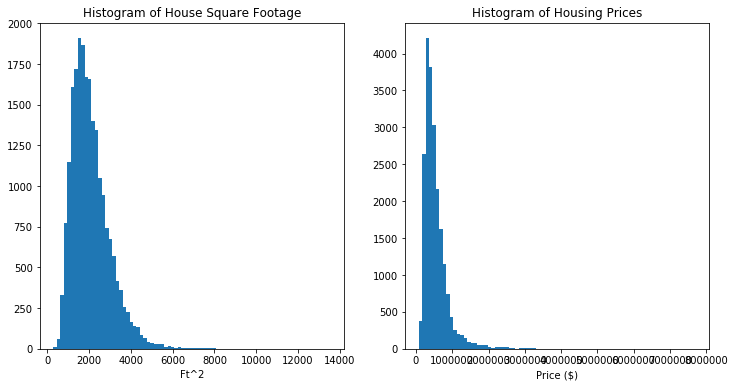

In [6]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram of House Square Footage")

cost.hist(df.price, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram of Housing Prices")

plt.show()

Usando matplotlib (plt) imprimimos dois histogramas para observar a distribuição de preços de casas e área em pés quadrados. O que encontramos é que ambas as variáveis têm distribuição altamente correlacionadas.
Agora que temos um bom senso do nosso data set e sabemos as distribuições das variáveis que estamos tentando medir, vamos fazer um pouco de análise de regressão. Primeiro importamos statsmodels para pegar o estimador da menor regressão quadrática. O módulo "Ordinary Least Squares" vai fazer o trabalho.

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\augus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Quando seu codigo produz um resumo de regressão linear com OLS com apenas duas variáveis, este será sua fórmula:
$Reg = ols('Dependent variable ~ independent variable(s), dataframe).fit()$
$print(Reg.summary())$

Quando olhamos para preço de casas e área para casas no condado de King, nós imprimimos o seguinte relatório de resumo:

In [8]:
m = ols('price ~ sqft_living', df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:51:18   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

Quando imprimimos o resumo da regressão OLS, toda a informação relevante pode ser facilmente encontrada, incluindo R-squared, t-statistics, erro padrão, e os coeficientes de correlação. Olhando apra a saída, fica claro que há uma relação extremamente significante entre square footage e housing prices já que há um t-value extremamente alto de 144920, e um $p>|t|$ de 0% - que essensialmente significa que essa relação tem uma chance proxima de 0 de ocorrer devido variação estatística ou coincidência.
Esta relação também tem magnitude descendente - para cada 100 pés quadrados adicionais que uma casa tem, nos podemos prever que ela será 28 mil dolares mais cara que a média. É fácil ajustar a formula para incluir mais que uma variável independente, apenas seguindo a formula:
$Reg = ols('Dependent variable ~ ivar1 + ivar2 + ivar3... + ivarN,dataframe).fit()$
$print(Reg.summary())$


In [9]:
m = ols('price ~ sqft_living + bedrooms + grade + condition',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6749.
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:51:18   Log-Likelihood:            -2.9884e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21608   BIC:                         5.977e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.398e+05   1.81e+04    -40.855      

Em nossa saida da regressão com várias variáveis acima, aprendemos que, usando variáveis independentes adicionais, como o número de quartos, podemos prover um modelo que se encaixa melhor nos dados, já que a variável R-squared para essa regressão subiu para 0,555. Isso significa que subimos da capacidade de explicar cerca de 49,3% da variação no modelo inicial para 55,5% com a adição de algumas variáveis independentes.
#### Vizualizando os resultados da regressão
Ter as saidas do resumo da regressão é importante para checar a acurácia do modelo de regressão e dados para serem usados para estimativas de predição - porém, visualizar a regressão é um passo importante para comunicar os resultados da regressão em um formato mais claro.
Esta seção irá contar inteiramente com o Seaborn (sns), que tem uma função simples e intuitiva para plotar gráficos de linhas de regressão com scatterplots. Escolhemos criar um jointplot para square footage e price que mostra a linha de regressão assim como as plots de distribuição para cada variável.

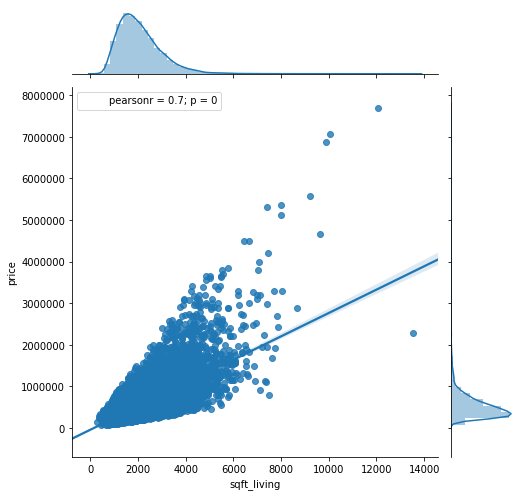

In [10]:
sns.jointplot(x="sqft_living", y="price", data=df, kind='reg', fit_reg= True, size = 7)
plt.show()

Isso concluí o exemplo de regressão. porém há muitas outras maneiras de realizar uma análise de regressão, especialmente utilizando certas técnicas.

## Criando um Modelo de Clusterização em Python
#### Qual o problema que queremos resolver?
Queremos criar agrupamentos naturais para um conjunto de objetos de dados que podem não ser explicitamente declarados nos próprios dados. Nossa análise usará dados de erupções do Old Faithful, o famoso geiser no parque de Yellowstone. Os dados contêm apenas dois atributos, tempo de espera entre erupções (minutos) e duração da erupção (minutos). Ter apenas dois atributos facilita a criação de um modelo simples de clusterização k-means.
#### O que é um modelo de clusterização?
Modelso de clusterização k-means funcionam da seguinte maneira:
<ol>
<li> Começa com um conjunto de centroides k selecionados aleatóriamente (o suposto centro de um cluster k).</li>
<li> determina qual observação está em qual cluster, baseado em qual centroide está mais próximo (usando distância quadrada Euclideana).</li>
<li> Recalcula os centroids de cada cluster minimizando a distância quadrada Euclidiana para cada observação no cluster.</li>
<li> Repete 2 e 3 até que os membros dos clusters (e também a posição dos centroides) não muda mais.</li>
</ol>
Vamos continuar aplicando esta técnica no data set Old Faithful
#### Primeiro passo: Análise de dados exploratória
Primeiro vamos importar todos os módulos necessários para a exploração dos dados.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

%matplotlib inline

faithful = pd.read_csv('faithful.csv')
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Tudo o que fizemos foi ler o csv do diretório local e mostramos as 5 primeiras entradas de dados. Felizmente, sabemos que esse dataset não tem colunas com valores faltando, então podemos pular a seção de limpeza de dados nesse exemplo. Vamos olhar um grafico de dispersão básico dos dados.

Text(0,0.5,'Tempo entre erupções (minutos)')

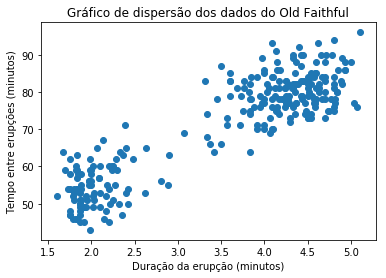

In [4]:
faithful.columns = ['eruptions', 'waiting']

plt.scatter(faithful.eruptions, faithful.waiting)
plt.title('Gráfico de dispersão dos dados do Old Faithful')
plt.xlabel('Duração da erupção (minutos)')
plt.ylabel('Tempo entre erupções (minutos)')


#### Segundo passo: Construir o modelo de cluster
O que vemos é um gráfico de dispersão que tem dois clusters bem aparentes, mas o data set não etiqueta nenhum indivíduo como pertencente a algum grupo. Os próximos passos cobrirão o processo de diferenciar visualmente os dois grupos. No código abaixo, estabelecemos algumas variáveis importantes e alteraçõs no formato dos dados.

In [5]:
faith = np.array(faithful)

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(faith)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#### Criação da função e formatação
<ol>
<li> Lemos o dataframe faithful como um vetor numpy para que o sci-kit possa ler os dados</li>
<li> K = 2 foi escolhido como número de clusters porque há dois agrupamentos claros que tentaremos crear</li>
<li> A variável 'kmeans' é definida pela saída chamada do módulo cluster no sci-kit. Nós temos um número K de clusters e ajustamos os dados no vetor 'faith'</li>
</ol>
Agora que configuramos as variáveis para criação do modelo de cluster, vamos criar a visualização. O código abaixo vai plotar um gráfico de dispersão que colore por cluster, e dá o local final do centroid. 

<function matplotlib.pyplot.show>

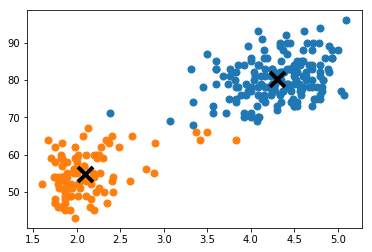

In [7]:
for i in range (k):
    # seleciona apenas observações de dados etiquetados como label == i 
    ds = faith[np.where(labels==i)]
    # plota as observações de dados
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    #plota os centroides
    lines = plt.plot(centroids[i,0], centroids[i,1], 'kx')
    # faz o centroid x ser maior
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show

#### Um rápido detalhamento do código acima:
<ol>
<li> Todo o trabalho feito para agrupar os dados em dois grupos foi feito na seção anterior de código onde usamos o comando kmeans.fit(faith). Esta seção de código simplemente cria o plot que mostra isso.</li>
<li> A variável ds é simplesmente os dados originais, porem reformatado para incluir a nova cor baseada no número de grupos - o número de inteiros em k.</li>
<li> plt.plot chama o x-data, o y-data, o formato dos objetos e o tamanho dos círculos</li>
<li> O resto do código mostra os centróides finais do processo de clusterização k-means, e controla o tamanho e grossura dos marcadores dos centróides.</li>
</ol>
E assim temos um modelo simples de clusters. Esse código poderia ser adaptado para incluir um número diferente de clusters, porém, para este problema, faz sentido utilizar apenas 2 clusters. Agora que temos esses clusters que parecem bem definidos, podemos inferir o significado desses clusters. O que eles mostram? O cluster laranja: consiste das erupções mais curtas com menor tempo de espera entre erupções e pode ser definida como 'fraca ou tiro-rápido', enquanto o cluster azul pode ser chamado de 'erupções poderosas'.
## Conclusão
Mineração de dados engloba várias técnicas de modelos preditivos e podemos utilizar vários programas de mineração de dados.